#### Load Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#### Load and understand data

In [4]:
# Loading Dataset
df_train = pd.read_csv("Uniqlo(FastRetailing) 2012-2016 Training - stocks2012-2016.csv")
df_test = pd.read_csv("Uniqlo(FastRetailing) 2017 Test - stocks2017.csv")

# check first five rows of the data
df_train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [5]:
# sorting data in ascending order with respect to date
df_train = df_train.sort_index(axis = 0)
df_test = df_test.sort_index(axis = 0)

# Check first five rows of the data
df_train.head()

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000


In [6]:
# displaying full dataset
pd.set_option('display.max_rows', None)     

display(df_train)

,Date,Open,High,Low,Close,Volume,Stock Trading
0,2016-12-30,42120,42330,41700,41830,610000,25628028000
1,2016-12-29,43000,43220,42540,42660,448400,19188227000
2,2016-12-28,43940,43970,43270,43270,339900,14780670000
3,2016-12-27,43140,43700,43140,43620,400100,17427993000
4,2016-12-26,43310,43660,43090,43340,358200,15547803000
5,2016-12-22,43660,43840,43190,43480,381600,16586491000
6,2016-12-21,43900,44370,43610,44000,658900,28994316000
7,2016-12-20,42910,43630,42860,43620,499400,21606102000
8,2016-12-19,42790,43150,42740,43130,358700,15428531000
9,2016-12-16,43350,43550,42810,43130,542000,23380606000


### Exploratory Data Analysis

In [9]:
# shape of the dataset
print("Shape of the train dataset is:", df_train.shape)
print("Shape of the test dataset is:", df_test.shape)

Shape of the train dataset is: (1226, 7)
Shape of the test dataset is: (7, 7)


In [10]:
# checking info of dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           1226 non-null   object
 1   Open           1226 non-null   int64 
 2   High           1226 non-null   int64 
 3   Low            1226 non-null   int64 
 4   Close          1226 non-null   int64 
 5   Volume         1226 non-null   int64 
 6   Stock Trading  1226 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 67.2+ KB


In [11]:
# Checking null values
df_train.isnull().sum()  

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Stock Trading    0
dtype: int64

In [13]:
# Checking statistical properties of data
df_train.describe()

,Open,High,Low,Close,Volume,Stock Trading
count,1226.000000,1226.000000,1226.000000,1226.000000,1.226000e+03,1.226000e+03
mean,33754.416803,34178.784666,33347.903752,33760.583197,7.275556e+05,2.440933e+10
std,10813.440409,10936.326802,10695.664102,10815.661389,4.137178e+05,1.526300e+10
min,13720.000000,13840.000000,13600.000000,13720.000000,1.391000e+05,3.966140e+09
25%,27788.750000,28091.250000,27401.250000,27675.000000,4.873000e+05,1.454097e+10
50%,34445.000000,34835.000000,33925.000000,34412.500000,6.260000e+05,2.153772e+10
75%,41412.500000,41900.000000,40810.000000,41365.000000,8.267000e+05,3.015922e+10
max,61550.000000,61970.000000,60740.000000,61930.000000,4.937300e+06,1.460450e+11


### Data visualization

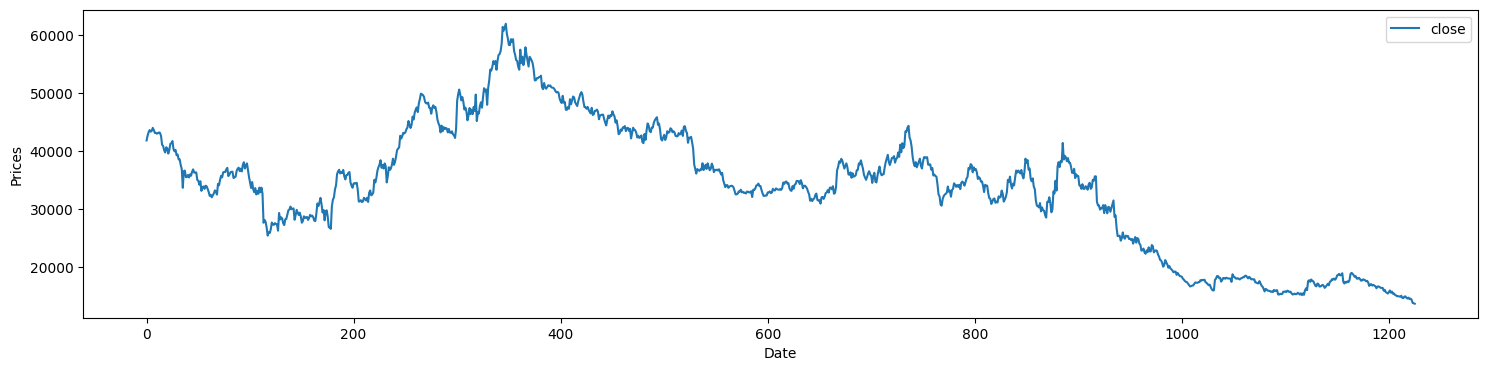

In [50]:
# Plotting distribution for Close
plt.figure(figsize=(18,4))
df_train['Close'].plot(label='close')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()


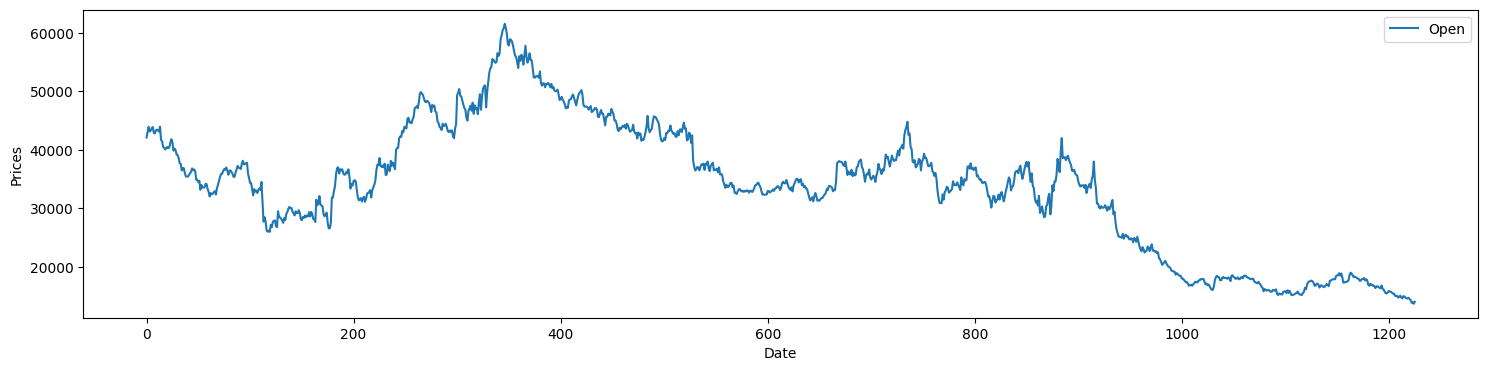

In [49]:
# Plotting distribution for Open
plt.figure(figsize=(18,4))
df_train['Open'].plot(label='Open')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

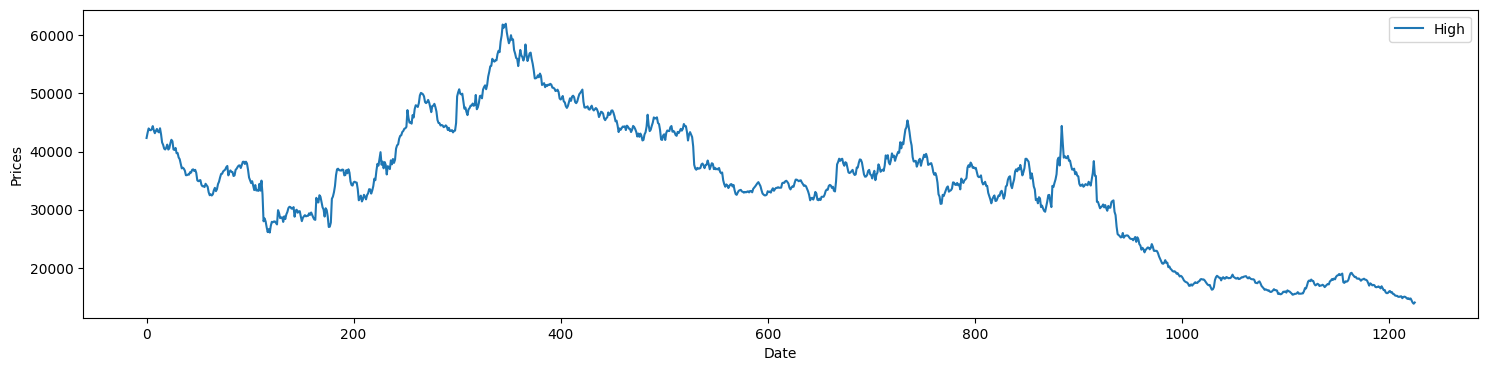

In [48]:
# Plotting distribution for High
plt.figure(figsize=(18,4))
df_train['High'].plot(label='High')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

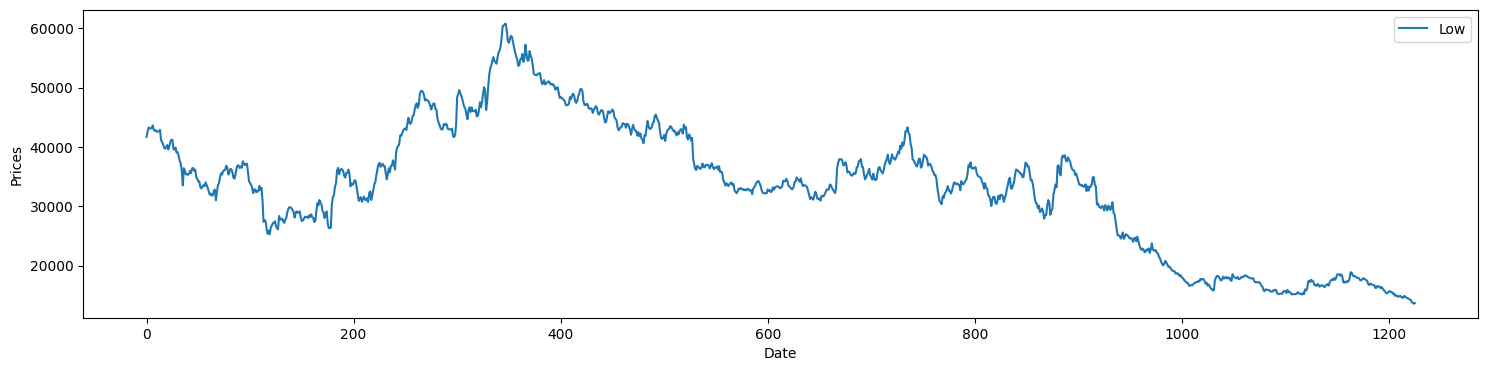

In [47]:
# Plotting distribution for Low
plt.figure(figsize=(18,4))
df_train['Low'].plot(label='Low')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

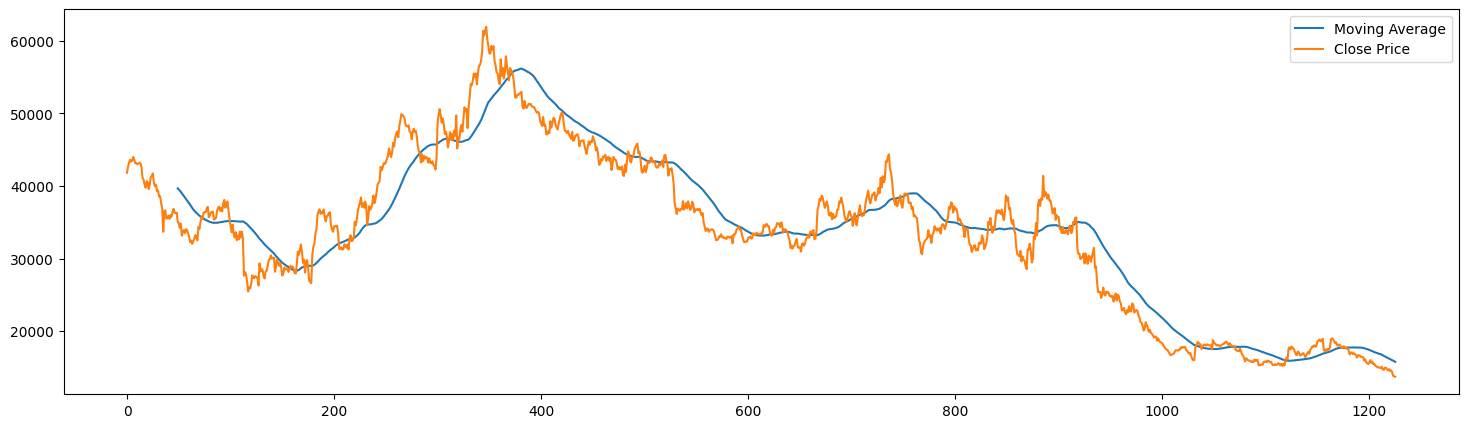

In [45]:
df_train['Moving_Average'] = df_train['Close'].rolling(50).mean()
#plot the moving average
plt.figure(figsize=(18, 5))
df_train['Moving_Average'].plot(label='Moving Average')
df_train['Close'].plot(label='Close Price')
plt.legend()
plt.show()

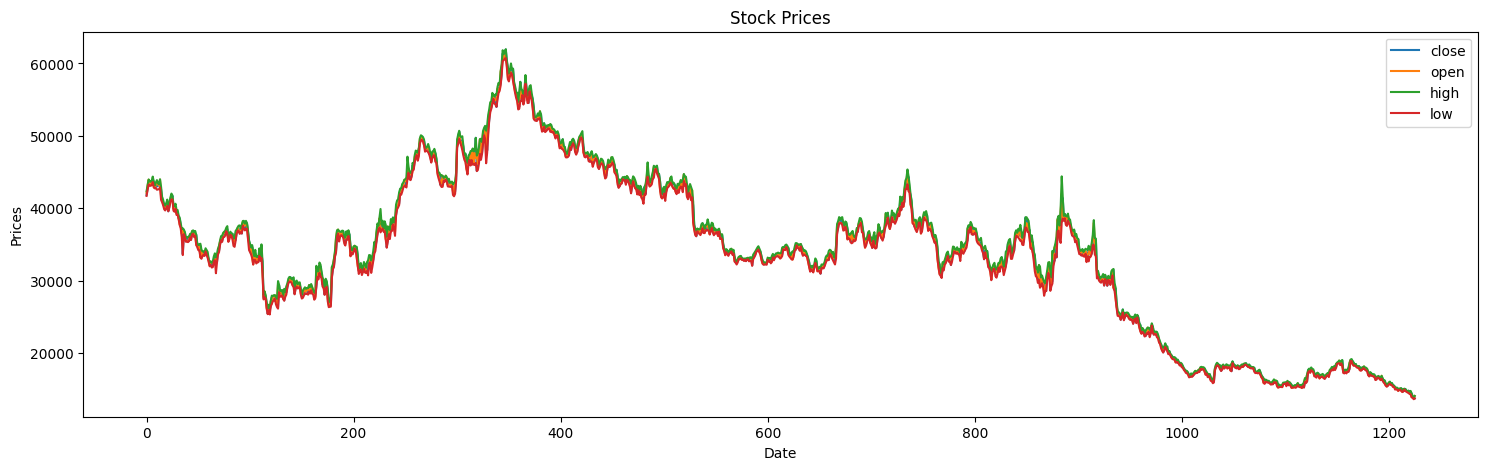

In [51]:
# Multiline plot for Close, Open, High and Low
plt.subplots(figsize=(18,5))
plt.xlabel('Date')
plt.ylabel('Prices')
df_train['Close'].plot(label='close')
df_train['Open'].plot(label='open')
df_train['High'].plot(label='high')
df_train['Low'].plot(label='low')
plt.legend()
plt.title('Stock Prices')
plt.show()